In [1]:
import os
os.chdir(os.path.dirname(os.path.abspath('.')))

from dice import DICE
from paraphrase_mpnet_embeddings import ParaphraseMpnetEmbeddings

import pandas as pd 
import numpy as np
from datasets import Dataset

from metrics import evaluate_clustering_performance
from plots.si_da_ca import plot_si_da_ca

### Olist

In [2]:
olist_df =pd.read_csv('/hadatasets/fillipe.silva/LLMSegm/data/olist/test_rfm.csv')
olist_df.head()

,Recency,Frequancy,Monetary
0,149,1,314.96
1,406,1,231.27
2,512,1,99.35
3,423,2,166.28
4,99,1,40.22


In [3]:
olist_df['Recency'].describe()

count    18199.000000
mean       234.424034
std        151.976844
min         -1.000000
25%        112.000000
50%        216.000000
75%        343.000000
max        694.000000
Name: Recency, dtype: float64

In [4]:
olist_df['Frequancy'].describe()

count    18199.000000
mean         1.231826
std          0.912267
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequancy, dtype: float64

In [5]:
olist_df['Monetary'].describe()

count    18199.000000
mean       203.580380
std        403.282338
min         10.070000
25%         63.270000
50%        112.300000
75%        200.330000
max      22346.600000
Name: Monetary, dtype: float64

In [6]:
sentence_embedder = ParaphraseMpnetEmbeddings()
dice_recency = DICE(d=20, min_bound=-1, max_bound=694)
dice_frequancy = DICE(d=20, min_bound=1, max_bound=75)
dice_monetary = DICE(d=20, min_bound=10.07, max_bound=22346.60)

/home/fillipe.silva/miniconda3/envs/erasmo/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/fillipe.silva/miniconda3/envs/erasmo/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
olist_df.head()

,Recency,Frequancy,Monetary
0,149,1,314.96
1,406,1,231.27
2,512,1,99.35
3,423,2,166.28
4,99,1,40.22


In [7]:
df = pd.DataFrame()
df['r'] = olist_df['Recency'].apply(dice_recency.make_dice)
df['f'] = olist_df['Frequancy'].apply(dice_frequancy.make_dice)
df['m'] = olist_df['Monetary'].apply(dice_monetary.make_dice)

In [8]:
embeddings_df = pd.DataFrame(df.apply(lambda row: np.concatenate((row['r'], row['f'], row['m'])), axis=1).tolist())

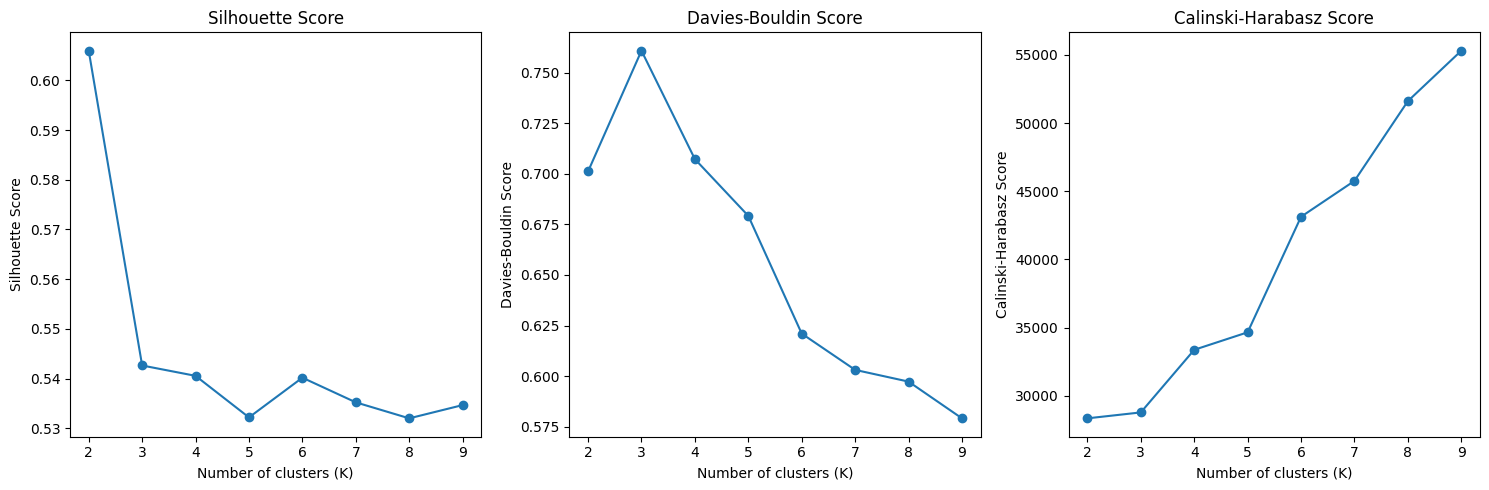

In [10]:
plot_si_da_ca(embeddings_df)

In [13]:
olist_si_da_ca = evaluate_clustering_performance(embeddings_df, 2)
'''
Number of clusters: 2
Silhouette Score 0.6055637858786206
Davies-Bouldin Index 0.7013500515098317
Calinski Harabasz Score 28348.867311676742
'''

Number of clusters: 2
Silhouette Score 0.6059482308387528
Davies-Bouldin Index 0.7011321526898006
Calinski Harabasz Score 28350.243231224693


'\nNumber of clusters: 2\nSilhouette Score 0.6055637858786206\nDavies-Bouldin Index 0.7013500515098317\nCalinski Harabasz Score 28348.867311676742\n'